In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.scimath import sqrt as csqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
L = 1e-3
r_max = 0.8
lambda_ress = 1550e-9
neff = 1.447

c = 299792458
dlambda = np.linspace(lambda_ress - 2e-9, lambda_ress + 2e-9, 40000)

av_sigma = 0

dneff ac = 0.000712261337882327
dneff dc = 0.0


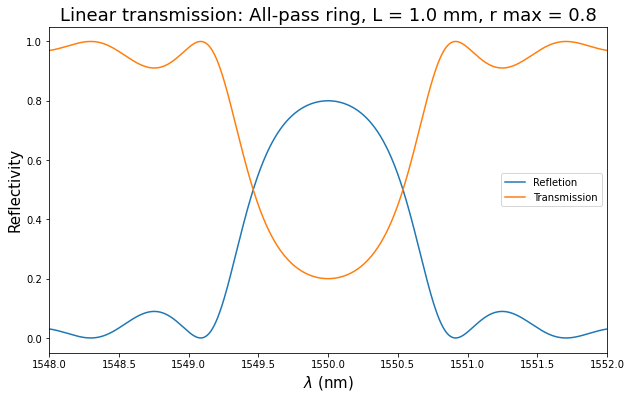

In [7]:
drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
sigma = av_sigma + drc_delta
# rmax = tanh²(kappa*L)
kappa = np.arctanh(np.sqrt(r_max))/L
# r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))


dneff_ac = kappa*lambda_ress/np.pi
print('dneff ac = ' + str(dneff_ac))
dneff_dc = av_sigma*lambda_ress/(2*np.pi)
print('dneff dc = ' + str(dneff_dc))


plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, refl)
plt.plot(dlambda*1e9, 1-refl)
# plt.axhline(y = 10*np.log10(1/2))
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity',fontsize =15)
plt.title(r'Linear transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

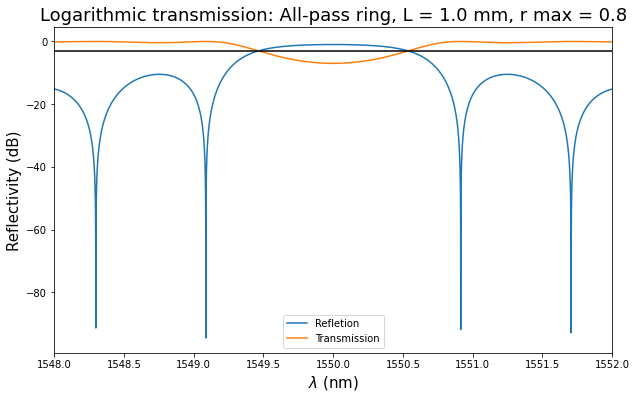

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, 10*np.log10(refl))
plt.plot(dlambda*1e9, 10*np.log10(1-refl))
plt.axhline(y = 10*np.log10(1/2), color = 'black')
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity (dB)',fontsize =15)
plt.title(r'Logarithmic transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

L = 0.002, r_max = 0.1:
dneff ac = 8.077873054098734e-05
dneff dc = 0.0

L = 0.004, r_max = 0.1:
dneff ac = 4.038936527049367e-05
dneff dc = 0.0

L = 0.002, r_max = 0.4:
dneff ac = 0.0001839070603489284
dneff dc = 0.0

L = 0.004, r_max = 0.4:
dneff ac = 9.19535301744642e-05
dneff dc = 0.0

L = 0.002, r_max = 0.75:
dneff ac = 0.0003248805566662116
dneff dc = 0.0

L = 0.004, r_max = 0.75:
dneff ac = 0.0001624402783331058
dneff dc = 0.0



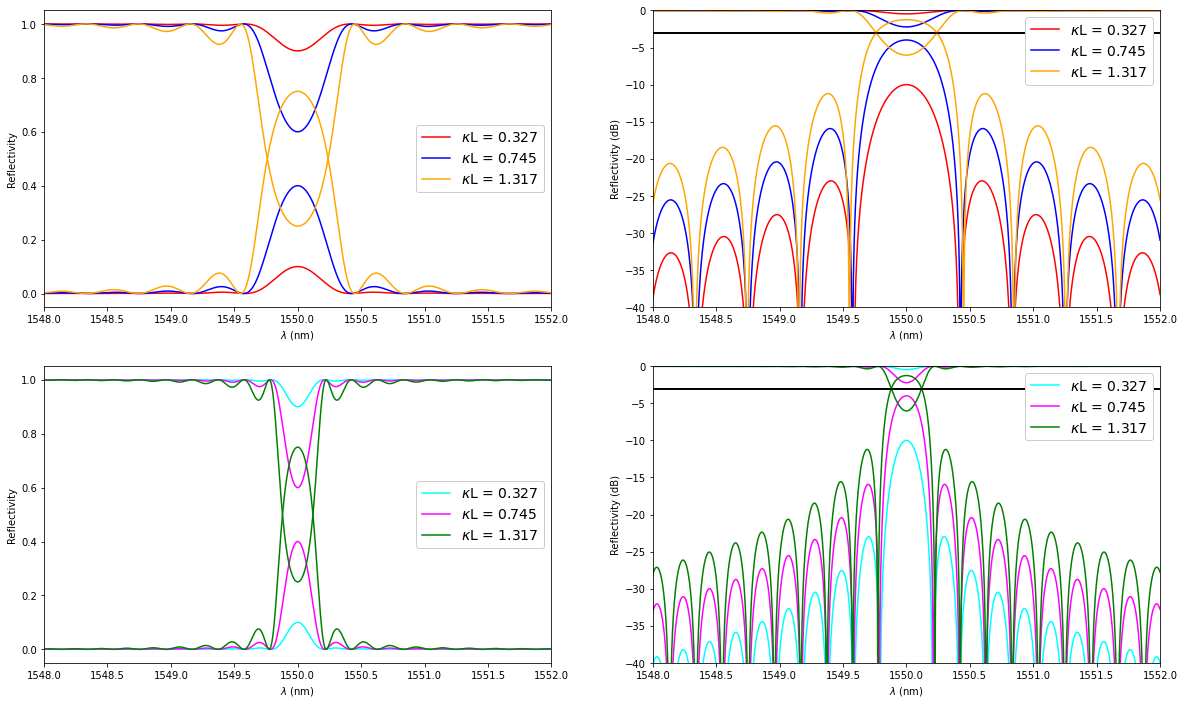

In [8]:
L_range = [2e-3, 4e-3]
r_max_range = [0.1, 0.4, 0.75]
colors = ['red', 'cyan', 'blue', 'magenta', 'orange', 'green']
j = 0

fig12, ax = plt.subplots(2, 2, figsize=(20,12))
for r_max in r_max_range:
  for i in range(2):
    L = L_range[i]

    drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
    sigma = av_sigma + drc_delta
    # rmax = tanh²(kappa*L)
    kappa = np.arctanh(np.sqrt(r_max))/L

    print('L = ' + str(L) + ', r_max = ' + str(r_max) + ':')
    dneff_ac = kappa*lambda_ress/np.pi
    print('dneff ac = ' + str(dneff_ac))
    dneff_dc = av_sigma*lambda_ress/(2*np.pi)
    print('dneff dc = ' + str(dneff_dc) + '\n')

    # r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
    refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))

    ax[i][0].plot(dlambda*1e9,refl, label = '$\kappa$'+'L = '+str(round(kappa*L, 3)), color = colors[j])
    ax[i][0].plot(dlambda*1e9,1-refl, color = colors[j])
    ax[i][0].set_xlabel('$\lambda$ (nm)')
    ax[i][0].set_ylabel('Reflectivity')
    ax[i][0].set_xlim([1548, 1552])
    ax[i][0].legend(framealpha = 1, fontsize = 14)

    ax[i][1].plot(dlambda*1e9,10*np.log10(refl), label = '$\kappa$'+'L = '+str(round(kappa*L, 3)), color = colors[j])
    ax[i][1].plot(dlambda*1e9,10*np.log10(1-refl), color = colors[j])
    ax[i][1].axhline(y = 10*np.log10(1/2), color = 'black')
    ax[i][1].set_xlim([1548, 1552])
    ax[i][1].set_ylim([-40, 0])
    ax[i][1].set_xlabel('$\lambda$ (nm)')
    ax[i][1].set_ylabel('Reflectivity (dB)')
    ax[i][1].legend(framealpha = 1, fontsize = 14)
    j = j + 1

## INTERCONNECT simulation

In [ ]:
import os
import imp
import sys
import importlib.util

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname("C:/Users/Victor Hugo/Desktop/i'm a robot/aulas/p8/temporario"))
spec_win.loader.exec_module(lumapi)

In [ ]:
bragg = lumapi.INTERCONNECT(filename='bragg_tests.icp', hide=False) 

: 

: 

###### Failed to open INTERCONNECT through VSCode, so initially I'll do it manually

In [ ]:
# L = 1e-3
# r_max = 0.8


In [ ]:
# L = 2e-3
# r_max = 0.4